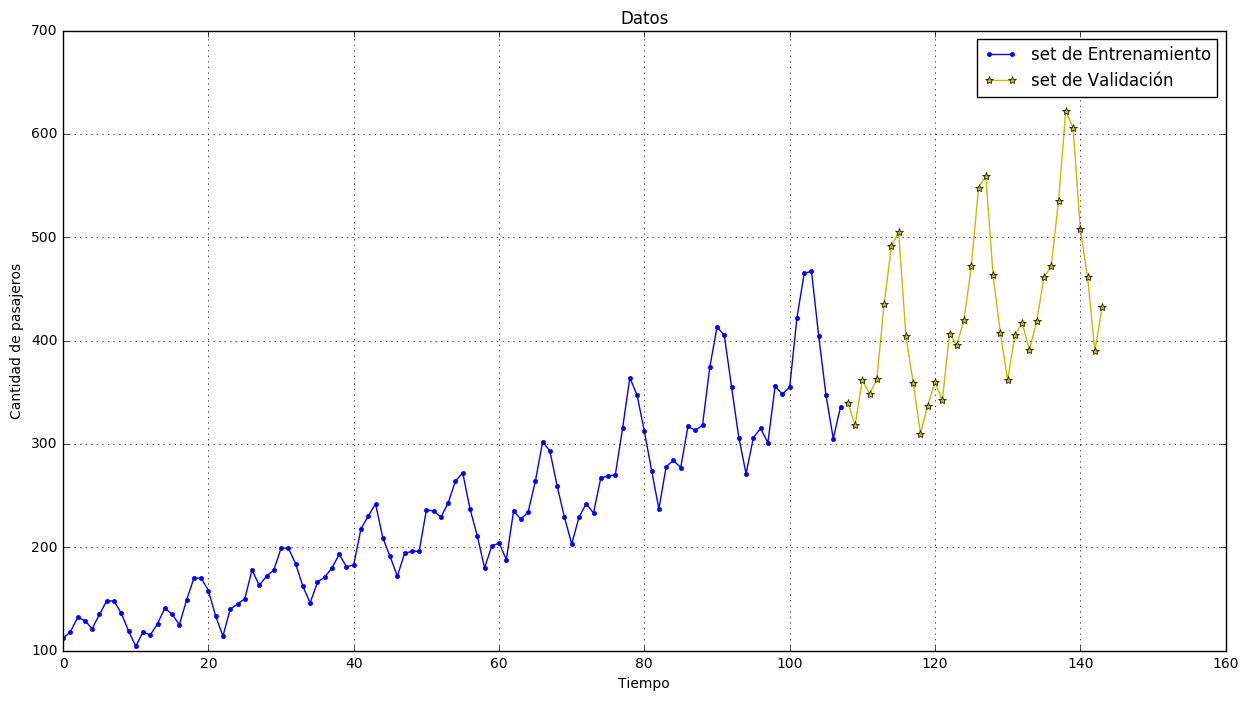

In [1]:
import matplotlib.pyplot as plt
import numpy as np



#Cargar los datos
with open("DatosT1/datosT1P2.txt", "r") as f:
    content = f.readlines()
    content = [x.strip('\n') for x in content]
X=[]
Y=[]
for i in range(len(content)):
    p=content[i]
    X.append(float(p[0:p.find(' ')]))
    Y.append(float(p[p.find(' '):]))
    
#Separar set Entrenamiento-Validación
x_e=X[0:int(len(X)*0.75)]
y_e=Y[0:int(len(X)*0.75)]
x_v=X[int(len(X)*0.75):]
y_v=Y[int(len(X)*0.75):]

#Plotear
fig = plt.figure(figsize=(15,8))
plt.plot(x_e,y_e,'b.-')
plt.plot(x_v,y_v,'y*-')
plt.title('Datos')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasajeros')
plt.legend(('set de Entrenamiento','set de Validación'))
plt.grid()
plt.show()

         Current function value: 556.062830
         Iterations: 65
         Function evaluations: 86
         Gradient evaluations: 85
{'theta': array([  1.15173335e+02,   1.68295344e+00,   1.79507050e-03,
         6.04282396e-05]), 'sigma_n_log_': array(3.5098263193215)}


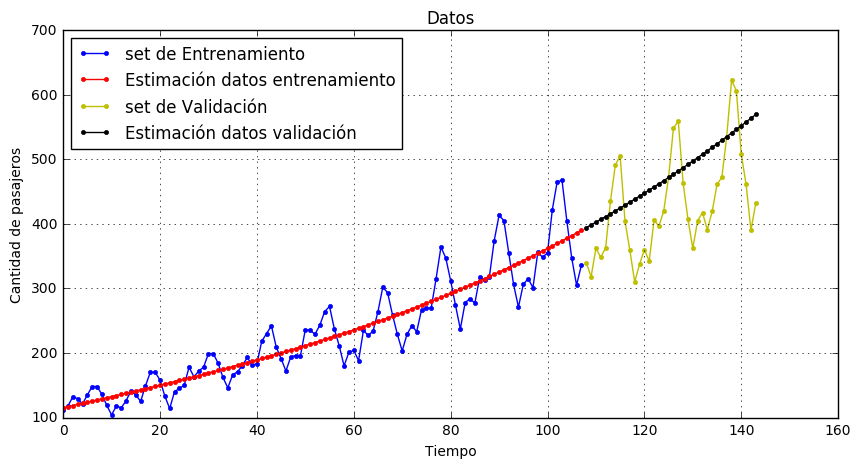

1109.20069054
6899.21435718


In [418]:
import pymc3 as pm
from pymc3 import Model, Normal, HalfNormal, find_MAP
import theano.tensor as tt
import numpy as np
import matplotlib.pyplot as plt

#Cargar los datos
with open("DatosT1/datosT1P2.txt", "r") as f:
    content = f.readlines()
    content = [x.strip('\n') for x in content]
X=[]
Y=[]
for i in range(len(content)):
    p=content[i]
    X.append(float(p[0:p.find(' ')]))
    Y.append(float(p[p.find(' '):]))
    
#Separar set Entrenamiento-Validación
xx=[float(i) for i in X]

x_e=X[0:int(len(X)*0.75)]
y_e=Y[0:int(len(X)*0.75)]
x_v=X[int(len(X)*0.75):]
y_v=Y[int(len(X)*0.75):]

import theano.tensor as tt

basic_model = pm.Model()

with basic_model:
    
    # Priors for unknown model parameters
    theta = pm.Normal('theta', mu=-5, sd=100, shape = 4)
    sigma = pm.HalfNormal('sigma_n', sd=100)

    # Expected value of outcome
    mu_obs = theta[0]+theta[1]*x_e+theta[2]*np.power(x_e,2)+theta[3]*np.power(x_e,3)
       
    # Model
    Y_obs = pm.Normal('Y_obs', mu=mu_obs, sd=sigma, observed=y_e)
    
map_estimate = pm.find_MAP(model=basic_model)

print(map_estimate)
theta_h=map_estimate['theta']
sigma_h=map_estimate['sigma_n_log_']
#y_pool=np.dot(np.random.randn(len(x_e)),sigma_h)+theta_h[0]+np.dot(theta_h[1],x_e)+np.dot(theta_h[2],np.power(x_e,2))+np.dot(theta_h[3],np.power(x_e,3))
y_pool_e=theta_h[0]+np.dot(theta_h[1],x_e)+np.dot(theta_h[2],np.power(x_e,2))+np.dot(theta_h[3],np.power(x_e,3))
y_pool_v=theta_h[0]+np.dot(theta_h[1],x_v)+np.dot(theta_h[2],np.power(x_v,2))+np.dot(theta_h[3],np.power(x_v,3))

fig = plt.figure(figsize=(10,5))
plt.plot(x_e,y_e,'b.-')
plt.plot(x_e,y_pool_e,'r.-')
plt.plot(x_v,y_v,'y.-')
plt.plot(x_v,y_pool_v,'k.-')
plt.title('Datos')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasajeros')
plt.legend(('set de Entrenamiento','Estimación datos entrenamiento','set de Validación','Estimación datos validación'),loc=2)
plt.grid()
plt.show()

print(np.mean((y_e-y_pool_e)**2))
print(np.mean((y_v-y_pool_v)**2))

         Current function value: 519.630775
         Iterations: 77
         Function evaluations: 116
         Gradient evaluations: 104
[51.0036491834326, 275.9458089033567, 3.3485943352569754, -0.005483315101145567]


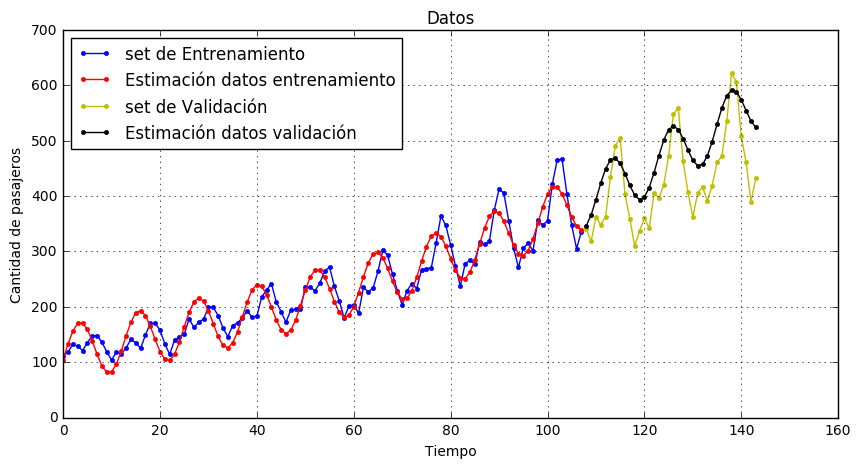

894.073884408
4311.64664749


In [416]:
import mle
import theano.tensor as tt
import theano
#s=[]

#for i in range(1,300):

theano.config.compute_test_value = 'ignore'
# Define model
x = mle.var('x', observed=True, vector=True)
y = mle.var('y', observed=True, vector=True)

theta1 = mle.var('theta1')
theta2 = mle.var('theta2')
theta3 = mle.var('theta3')
theta4 = mle.var('theta4')
sigma = mle.var('sigma')



model = mle.Normal(y,  y_pool_e + theta1*tt.sin(theta2*x_e+ theta3)*tt.exp(theta4*x_e), sigma)


# Fit model to data
result = model.fit({'x': np.asarray(x_e), 'y':np.asarray(y_e)}, {'theta1':250, 'theta2': 292, 'theta3': 11, 'theta4': 0.01, 'sigma': 100})
theta_sin = [float(result.x['theta1']), float(result.x['theta2']), float(result.x['theta3']),float(result.x['theta4'])]
print(theta_sin)


y_pools_e= y_pool_e + np.dot(theta_sin[0],np.sin(np.dot(theta_sin[1],x_e)+ theta_sin[2]),np.exp(np.dot(theta_sin[3],x_e)))
y_pools_v= y_pool_v + np.dot(theta_sin[0],np.sin(np.dot(theta_sin[1],x_v)+ theta_sin[2]),np.exp(np.dot(theta_sin[3],x_v)))
#s.append(np.mean((y_v-y_pools_v)**2))
    
fig = plt.figure(figsize=(10,5))
plt.plot(x_e,y_e,'b.-')
plt.plot(x_e,y_pools_e,'r.-')
plt.plot(x_v,y_v,'y.-')
plt.plot(x_v,y_pools_v,'k.-')
plt.title('Datos')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasajeros')
plt.legend(('set de Entrenamiento','Estimación datos entrenamiento','set de Validación','Estimación datos validación'),loc=2)
plt.grid()
plt.show()

print(np.mean((y_e-y_pools_e)**2))
print(np.mean((y_v-y_pools_v)**2))

In [337]:
print(s.index(min(s)))

99


         Current function value: 504.300081
         Iterations: 16
         Function evaluations: 73
         Gradient evaluations: 61
[50.278216177966, 998.4852330445983, -12.273004118026341, -0.0026691095290705957]
4052.81566143


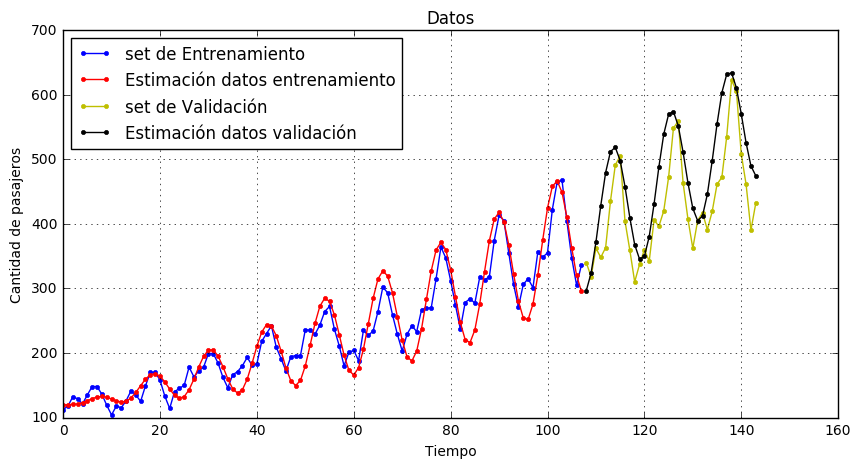

763.930725906
4052.81566143


In [419]:
import mle
import theano.tensor as tt
import theano


theano.config.compute_test_value = 'ignore'
# Define model
x = mle.var('x', observed=True, vector=True)
y = mle.var('y', observed=True, vector=True)

theta1 = mle.var('theta1')
theta2 = mle.var('theta2')
theta3 = mle.var('theta3')
theta4 = mle.var('theta4')
sigma = mle.var('sigma')


model = mle.Normal(y,y_pools_e + theta1*tt.sin(theta2*x_e+ theta3)*tt.exp(theta4*x_e), sigma)


# Fit model to data
result = model.fit({'x': np.asarray(x_e), 'y':np.asarray(y_e)}, {'theta1':50, 'theta2': 1000, 'theta3': -20, 'theta4':-0.02, 'sigma': 100})

theta_sin = [float(result.x['theta1']), float(result.x['theta2']), float(result.x['theta3']),float(result.x['theta4'])]
print(theta_sin)


y_poolss_e= y_pools_e + np.dot(theta_sin[0],np.sin(np.dot(theta_sin[1],x_e)+ theta_sin[2]),np.exp(np.dot(theta_sin[3],x_e)))
y_poolss_v= y_pools_v + np.dot(theta_sin[0],np.sin(np.dot(theta_sin[1],x_v)+ theta_sin[2]),np.exp(np.dot(theta_sin[3],x_v)))
s.append(np.mean((y_v-y_pools_v)**2))

print(np.mean((y_v-y_poolss_v)**2))
fig = plt.figure(figsize=(10,5))
plt.plot(x_e,y_e,'b.-')
plt.plot(x_e,y_poolss_e,'r.-')
plt.plot(x_v,y_v,'y.-')
plt.plot(x_v,y_poolss_v,'k.-')
plt.title('Datos')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasajeros')
plt.legend(('set de Entrenamiento','Estimación datos entrenamiento','set de Validación','Estimación datos validación'),loc=2)
plt.grid()
plt.show()

print(np.mean((y_e-y_poolss_e)**2))
print(np.mean((y_v-y_poolss_v)**2))

In [349]:
print((min(s)))

4311.64664749


99
